## Task 01

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

Representa el coeficiente de regresión sin estandarizar, el cual se calcula siguiendo el método de los mínimos cuadrados ordinarios y hay uno de dichos coeficientes para cada variable independiente.
Es el cambio estimado en unidades de "y" que se deriva del incremento de X₂ (variable independiente) cuando X₁ se mantiene constante.

https://physiostats.com/regresion-lineal-interpretacion-coeficientes/

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en la regresión lineal ocurre cuando las variables que se usan para predecir están muy conectadas. Esto causa resultados extraños en las interpretaciones y reduce la precisión de los coeficientes. También dificulta la identificación de variables importantes y puede conducir a problemas numéricos. (Sevilla, A. 2019)

https://economipedia.com/definiciones/multicolinealidad.html

## Task 02

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aleaz\AppData\Local\Temp\ipykernel_20292\3451566321.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Cargar el conjunto de datos desde el archivo CSV
file_path = 'dataset_phishing.csv'
df = pd.read_csv(file_path)

X = df[['length_url', 'nb_extCSS']] 
y = df.iloc[:, -1]

print(X.head())
print(y.head())

   length_url  nb_extCSS
0          37          0
1          77          0
2         126          0
3          18          0
4          55          0
0    legitimate
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object


In [3]:
# Codificar la variable de salida
dummies = pd.get_dummies(y)
concatenado = pd.concat([y, dummies], axis=1)
concatenado = concatenado.drop(['status', "legitimate"], axis=1)
y = concatenado

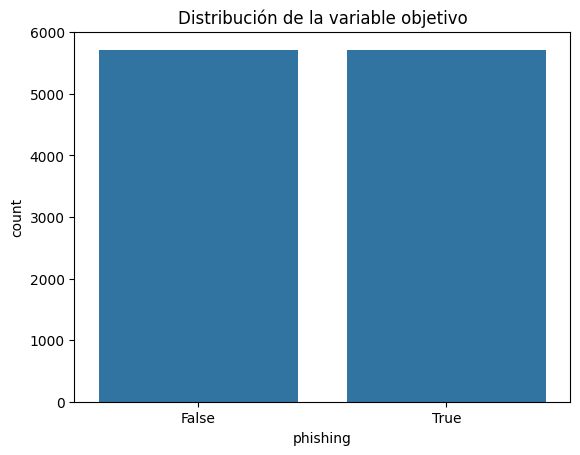

(11430, 2)
(11430, 1)


In [4]:
# Revisar si el dataset está balanceado
sns.countplot(x='phishing', data=y)
plt.title('Distribución de la variable objetivo')
plt.show()

print(X.shape)
print(y.shape)

In [5]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
y
y = y[:, -1]
y

array([False,  True,  True, ..., False, False,  True])

In [7]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1) # cambiamos a distribución 80/20
#X_entreno, X_temp, y_entreno, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [8]:
gradiente = pd.DataFrame()
# 'length_url', 'nb_dots', 'nb_at', 'domain_age'
gradiente["datosX1"] = pd.DataFrame(X_entreno[:, 0])
gradiente["datosX2"] = pd.DataFrame(X_entreno[:, 1])
gradiente["datosY"] = pd.DataFrame(y_entreno.astype(int))
gradiente["sigmoide"] = 0
gradiente["error"] = 0 
print(gradiente)

      datosX1  datosX2  datosY  sigmoide  error
0         127        0       1         0      0
1          51        0       1         0      0
2         122        0       0         0      0
3          32        0       0         0      0
4          30        1       1         0      0
...       ...      ...     ...       ...    ...
9139       41        3       0         0      0
9140       17        2       0         0      0
9141       40        1       1         0      0
9142       43        0       0         0      0
9143       60        1       0         0      0

[9144 rows x 5 columns]


In [9]:
def gradiente_w(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX1"]*w+gradiente["datosX2"]*w+b)))
    gradiente["error1"] = (gradiente["sigmoide"]-gradiente["datosY"])*gradiente["datosX1"]
    gradiente["error2"] = (gradiente["sigmoide"]-gradiente["datosY"])*gradiente["datosX2"]
    # obtener la media entre los dos errores. 
    derivative = (gradiente["error1"].mean()+gradiente["error2"].mean())/2
    return(derivative) 

def gradiente_b(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX1"]*w+gradiente["datosX2"]*w+b)))
    gradiente["error"] = (gradiente["sigmoide"]-gradiente["datosY"])
    derivative = gradiente["error"].mean()
    return(derivative) 

In [11]:
pasos_w = 0.01
pasos_b = 0.01
w = 0
b = 0

for i in range(1000):
    w = w - pasos_w*gradiente_w(w, b)
    b = b - pasos_b*gradiente_b(w, b)

print(w)
print(b)

0.025387857772645406
-0.9440969636140015


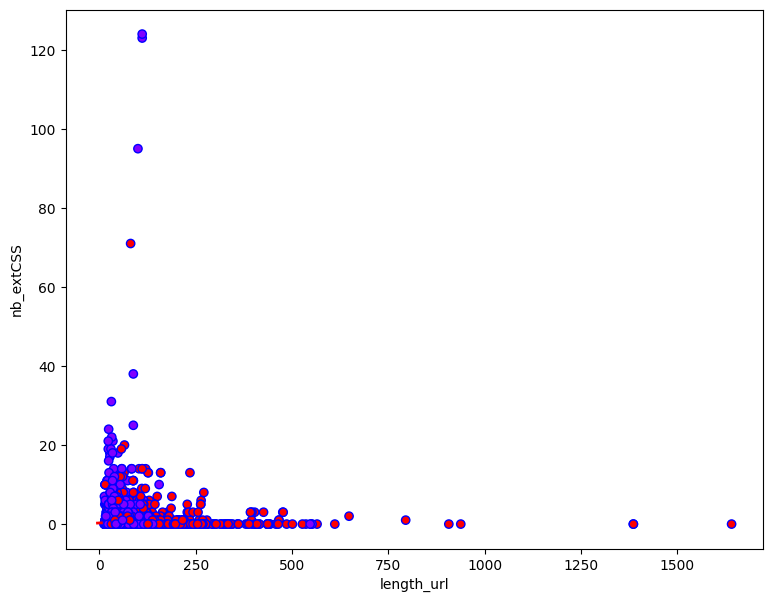

In [12]:
# Graficar la función sigmoide

x = np.linspace(-5, 5, 1000)

# funcion sigmoide
sig = 1 / (1 + np.exp(-(x*w+b)))

# configurar el tamaño de la figura
plt.figure(figsize = (9, 7))

# trazar la función sigmoide
plt.plot(x, sig, 'r', linewidth = 2, label='sigmoide')

# agregamos los puntos. 
plt.scatter(gradiente["datosX1"], gradiente["datosX2"], c=gradiente['datosY'], cmap='rainbow', edgecolors='b')

# configuraciones extra:
plt.xlabel('length_url')
plt.ylabel('nb_extCSS')
plt.show()

# Regresión Logística - Librerias

In [229]:
# Importar Librerías Generales
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [256]:
# importamos el dataset
df = pd.read_csv('dataset_phishing.csv')

print(df['status'].head())

# Es conveniente usar encoding para evitar problemas con los caracteres especiales (Legitimate y Phishing)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

# mostramos los primeros 5 registros
print(df['status'].head())


0    legitimate
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object
0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int32


In [237]:
# Dividimos el dataset en variables dependientes e independientes. 
from sklearn.model_selection import train_test_split
X = df[['length_url', 'nb_extCSS']] # variables independientes
y = df['status'] # variable dependiente

In [238]:
# Dividimos la data en entrenamiento y prueba. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# 80% entrenamiento, 20% prueba

# Entrenamos el modelo. 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0) # logistic regression
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [239]:
# Obtenemos la predicción, la probamos con la test_data.
prediction = model.predict(X_test)
ans = model.score(X_test, y_test)
print("prediction score: %.3f" % ans, "\n")

temptable = pd.DataFrame({'Real':y_test, 'Predicción':prediction})
if len(temptable) > 10:
    print(temptable.head(10))

prediction score: 0.589 

      Real  Predicción
6406     0           0
4266     1           0
1238     1           0
2646     1           0
2217     0           1
2158     1           0
9823     0           1
4401     1           0
9349     0           1
1399     0           1


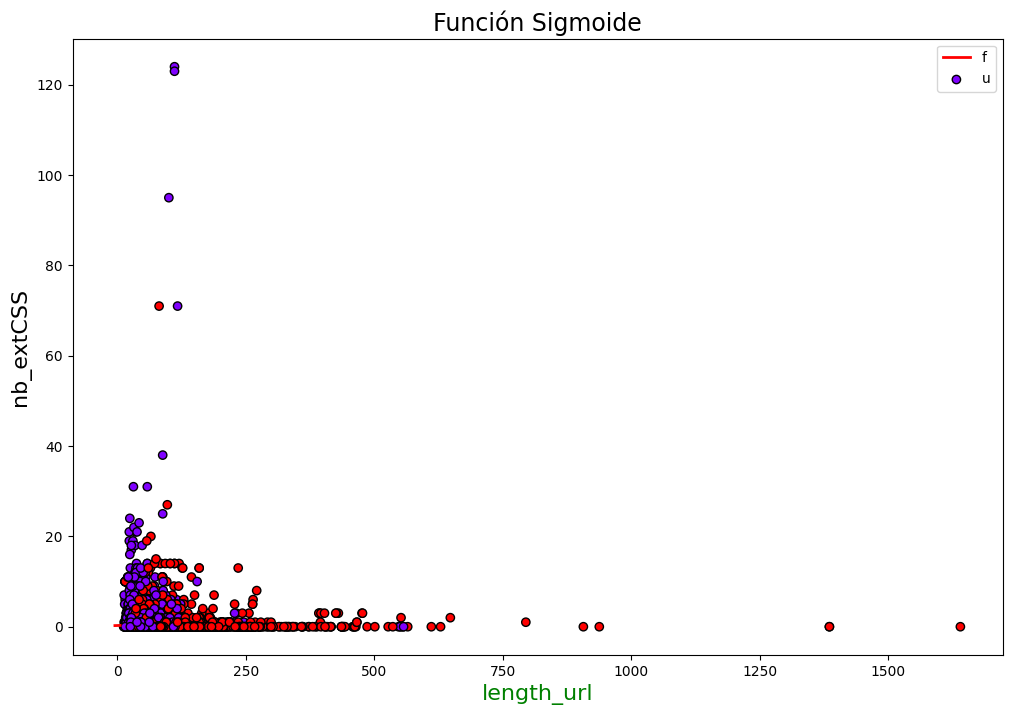

In [261]:
# Graficamos los resultados. 

x = np.linspace(-5, 5, 100)

# funcion sigmoide
sig = 1 / (1+np.exp(-(model.coef_[0][0]*x + model.intercept_[0])))

# crear la gráfica
plt.figure(figsize=(12,8))
plt.plot(x, sig, 'r', linewidth=2, label="sigmoide")

# agregar los puntos a la gráfica.
plt.scatter(df['length_url'], df['nb_extCSS'], c=df['status'], cmap='rainbow', edgecolors='k')
plt.title('Función Sigmoide', fontsize=17)
plt.xlabel('length_url', fontsize=16, color='green')
plt.ylabel('nb_extCSS', fontsize=16)
plt.show()

# K-nearest algorithm

## Sin librerias

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
data = pd.read_csv('dataset_phishing.csv')
data.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [ ]:
# Asignamos X y y. 
X = data[['length_url', 'nb_dots', 'nb_at', 'domain_age']]
y = data['status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print()

In [ ]:
def distancia_euclidiana(valor1, valor2):
    return np.sqrt(np.sum((valor1 - valor2)**2))

class algoritmo_KNN:
    def __init__(self, grupos=3):
        self.k = grupos

    def ajuste(self, X_data_train, y_data_train):
        self.X_train = X_data_train
        self.y_train = y_data_train

    def predecir(self, X_data_test):
        predicciones = [self._predecir(x) for x in X_data_test]
        return predicciones

    def _predecir(self, x):
        distancias = [distancia_euclidiana(x, x_train) for x_train in self.X_train]
        K_indices = np.argsort(distancias)[:self.k]
        K_vecinos = [self.y_train[i] for i in K_indices]
        mas_comun = Counter(K_vecinos).most_common()
        return mas_comun[0][0]

In [ ]:
# Crear una instancia del modelo KNN con k=3
knn_model = algoritmo_KNN(grupos=5)

# Entrenar el modelo con los datos de entrenamiento
knn_model.ajuste(X_train.values, y_train.values)

# Realizar predicciones sobre los datos de prueba
predicciones = knn_model.predecir(X_test.values)

# Imprimir las predicciones
print(predicciones)

KeyboardInterrupt: 

In [ ]:
acc = np.sum(predicciones == y_test) / len(y_test)
print(acc)

## Usando Librerías

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# importamos el dataset
df = pd.read_csv('dataset_phishing.csv')

# Es conveniente usar encoding para evitar problemas con los caracteres especiales (Legitimate y Phishing)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

# mostramos los primeros 5 registros
df.head()

In [ ]:
# Dividimos el dataset en variables dependientes e independientes. 
from sklearn.model_selection import train_test_split
X = df[['length_url', 'nb_extCSS']] # variables independientes
y = df['status'] # variable dependiente

In [ ]:
# Dividimos la data en entrenamiento y prueba. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# 80% entrenamiento, 20% prueba

In [ ]:
# Entrene el modelo con el algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
# Obtenemos el objeto de predicción, entrenado con X_test
y_pred = classifier.predict(X_test)

In [ ]:
# Reporteria de resultados
from sklearn.metrics import classification_report, confusion_matrix
print("****************************** Reporte de resultados ******************************")
print("matrix de confusion")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test['length_url'], X_test['nb_extCSS'], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)

plt.xlabel('length_url')
plt.ylabel('nb_extCSS')
plt.title('KNN')

plt.show()